In [19]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
input_file = "sports_Training.csv"
df = pd.read_csv(input_file, header=0)
df.head()

,Edad,Fuerza,Velocidad,Lesiones,Vision,Resistencia,Agilidad,CapacidadDecision,DeportePrimario
0,15.1,3,2,1,2,3,29,4,Futbol
1,15.4,3,2,0,3,5,18,8,Rugby
2,13.6,5,5,0,2,5,27,28,Voleibol
3,18.8,5,1,1,1,3,48,36,Voleibol
4,16.1,3,1,0,3,3,38,29,Futbol


In [3]:
data = df[(df['CapacidadDecision'] >= 3) &
 (df['CapacidadDecision'] <= 100)]
data.head()


,Edad,Fuerza,Velocidad,Lesiones,Vision,Resistencia,Agilidad,CapacidadDecision,DeportePrimario
0,15.1,3,2,1,2,3,29,4,Futbol
1,15.4,3,2,0,3,5,18,8,Rugby
2,13.6,5,5,0,2,5,27,28,Voleibol
3,18.8,5,1,1,1,3,48,36,Voleibol
4,16.1,3,1,0,3,3,38,29,Futbol


In [6]:
data.describe()

,Edad,Fuerza,Velocidad,Lesiones,Vision,Resistencia,Agilidad,CapacidadDecision
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,15.954564,3.500000,1.983402,0.639004,1.692946,3.856846,33.680498,29.157676
std,1.817320,1.460854,1.505269,0.480788,1.134010,1.331782,12.523973,19.477265
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,3.000000
25%,14.300000,3.000000,1.000000,0.000000,1.000000,3.000000,23.000000,11.000000
50%,15.900000,4.000000,1.000000,1.000000,2.000000,5.000000,31.500000,29.000000
75%,17.600000,4.000000,2.000000,1.000000,3.000000,5.000000,42.750000,40.000000
max,19.000000,7.000000,6.000000,1.000000,3.000000,6.000000,80.000000,100.000000


In [7]:
data.dtypes

Edad                 float64
Fuerza                 int64
Velocidad              int64
Lesiones               int64
Vision                 int64
Resistencia            int64
Agilidad               int64
CapacidadDecision      int64
DeportePrimario       object
dtype: object

In [10]:
y = data["DeportePrimario"]
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [12]:
X = data.drop(columns=['DeportePrimario']).values
type(X)

numpy.ndarray

In [13]:
type(y_encoded)

numpy.ndarray

In [14]:
train_X, test_X, train_y, test_y = train_test_split(X, y_encoded, test_size=0.25,
random_state=41, shuffle=True)

In [15]:
lda = LinearDiscriminantAnalysis()
lda = lda.fit(train_X, train_y)

In [48]:
type(test_X)

numpy.ndarray

In [16]:
y_pred = lda.predict(test_X)
print("Predicted vs Expected")
print(y_pred)
print(test_y)

Predicted vs Expected
[3 1 2 1 1 0 0 0 1 2 2 2 1 3 3 0 2 3 2 3 3 2 1 1 2 3 0 0 1 3 3 1 1 2 2 2 2
 1 1 1 1 2 3 3 1 1 3 1 1 1 1 2 1 1 1 1 2 3 3 1 2 1 0 1 2 1 1 2 1 1 3 2 2 2
 2 1 0 1 2 1 1 3 1 1 1 1 1 2 1 2 1 2 0 3 1 1 1 2 2 3 2 0 2 1 1 1 1 3 1 0 1
 1 3 1 2 3 1 1 3 1 3]
[1 2 2 1 3 3 2 2 1 1 2 2 1 1 3 2 2 0 2 3 1 2 2 0 2 0 1 0 1 3 0 0 2 1 0 1 2
 1 3 3 3 2 0 3 1 1 1 3 3 1 1 3 3 1 3 1 0 2 3 2 1 1 0 0 3 1 1 3 2 0 0 1 1 2
 0 3 1 1 0 0 2 0 1 3 3 1 2 0 3 2 2 2 0 0 2 3 1 1 2 2 2 0 1 3 2 1 1 1 1 3 2
 1 3 0 2 1 1 2 3 1 3]


In [17]:
print(classification_report(test_y, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.364     0.182     0.242        22
           1      0.429     0.600     0.500        40
           2      0.484     0.469     0.476        32
           3      0.348     0.296     0.320        27

    accuracy                          0.421       121
   macro avg      0.406     0.387     0.385       121
weighted avg      0.413     0.421     0.407       121



In [18]:
print(confusion_matrix(test_y, y_pred))

[[ 4  6  5  7]
 [ 2 24  8  6]
 [ 3 12 15  2]
 [ 2 14  3  8]]


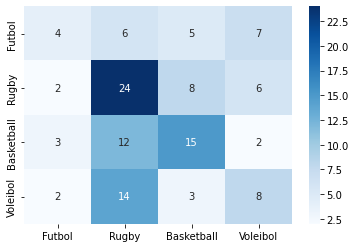

In [33]:
test_y_inv = le.inverse_transform(test_y)
y_pred_inv = le.inverse_transform(y_pred)
categories = ['Futbol', 'Rugby', "Basketball",'Voleibol']
cf_matrix = confusion_matrix(test_y_inv, y_pred_inv)
sns.heatmap(cf_matrix, annot=True,cmap='Blues', xticklabels=categories, yticklabels=categories)


## Predicciones en set no visto: Validación

In [43]:
validation_df = pd.read_csv("sports_Scoring.csv")
validation_df.head()

,Edad,Fuerza,Velocidad,Lesiones,Vision,Resistencia,Agilidad,CapacidadDecision
0,18.5,5,1,1,0,5,33,61
1,13.3,1,2,1,3,5,18,59
2,13.4,2,1,0,2,5,40,11
3,13.6,4,1,0,0,5,28,0
4,16.3,3,1,0,2,5,32,35


In [44]:
# Hacemos las transformaciones necesarias -> hacer que Capacidad_decision contenga el rango correcto de valores
validation_df = validation_df[(validation_df['CapacidadDecision'] >= 3) &
 (validation_df['CapacidadDecision'] <= 100)]
validation_df.describe()

,Edad,Fuerza,Velocidad,Lesiones,Vision,Resistencia,Agilidad,CapacidadDecision
count,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000
mean,15.982513,3.567063,1.987550,0.664969,1.599887,3.736276,34.013016,29.946237
std,1.729906,1.479915,1.551992,0.472135,1.188402,1.366378,12.299599,21.116807
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,3.000000
25%,14.500000,3.000000,1.000000,0.000000,0.000000,3.000000,24.000000,11.000000
50%,16.000000,4.000000,1.000000,1.000000,2.000000,3.000000,32.000000,29.000000
75%,17.400000,4.000000,2.000000,1.000000,3.000000,5.000000,43.000000,44.000000
max,19.000000,7.000000,6.000000,1.000000,3.000000,6.000000,80.000000,100.000000


In [45]:
validation_df.columns

Index(['Edad', 'Fuerza', 'Velocidad', 'Lesiones', 'Vision', 'Resistencia',
       'Agilidad', 'CapacidadDecision'],
      dtype='object')

In [50]:
y_pred = lda.predict(validation_df.to_numpy())

In [52]:
print(y_pred)

[0 2 1 ... 1 0 1]
